In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#Read the data set and storein a variable
df = pd.read_csv(r"C:\Users\Accenture\Documents\Projects\HIT\HIT-400\datasets\dataset-1.csv")

In [5]:
df.describe()

,oldpeak
count,1025.000000
mean,1.071512
std,1.175053
min,0.000000
25%,0.000000
50%,0.800000
75%,1.800000
max,6.200000


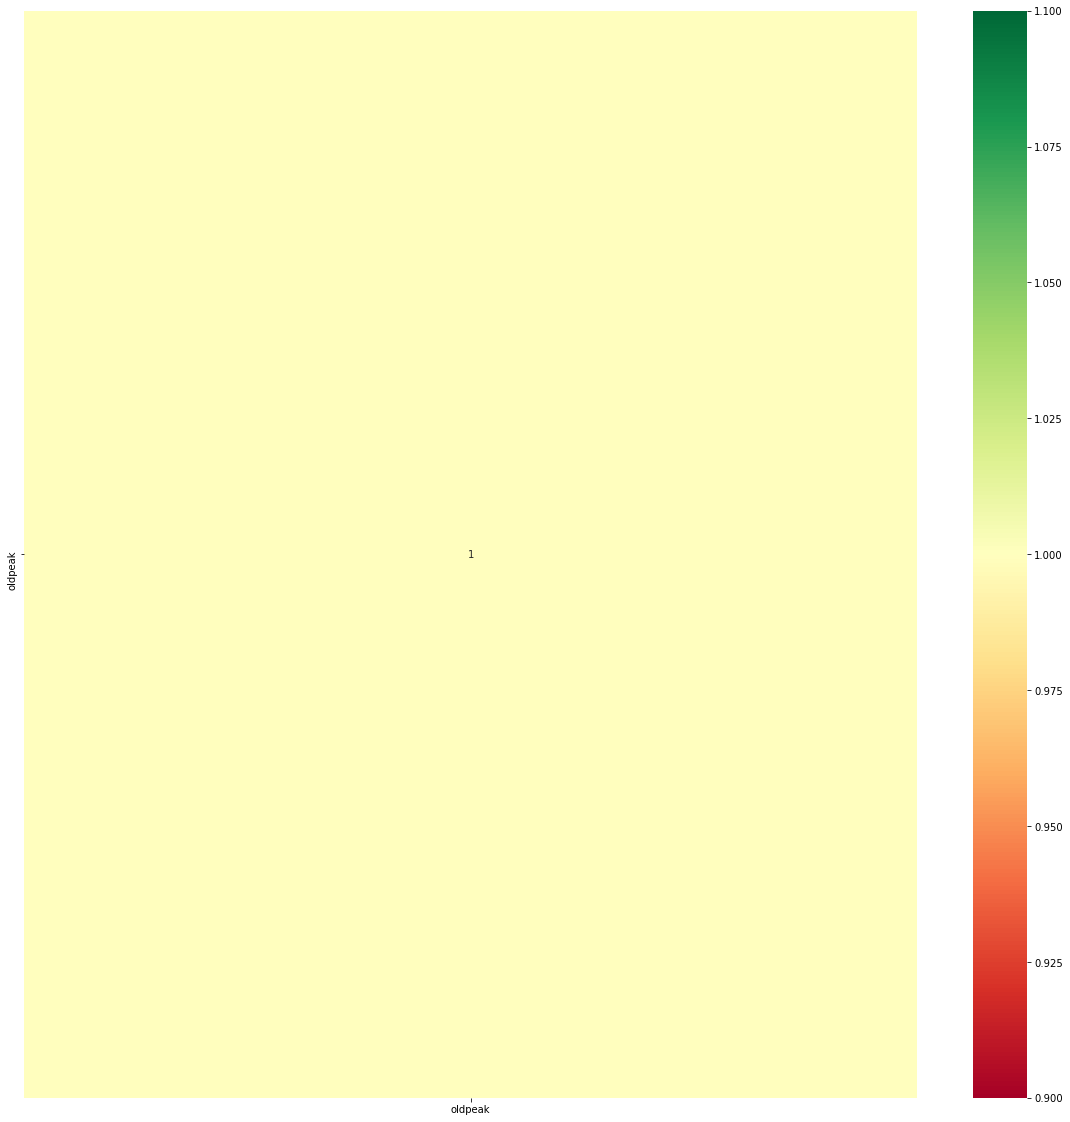

In [6]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'oldpeak'}>]], dtype=object)

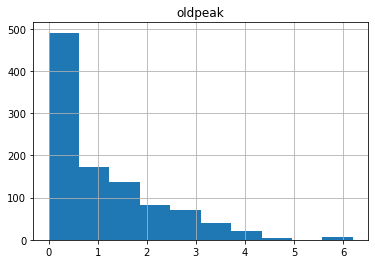

In [7]:
df.hist()

<AxesSubplot:xlabel='target', ylabel='count'>

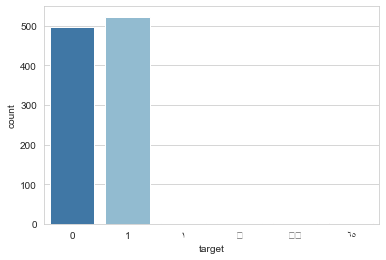

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [53]:
#dataset = pd.get_dummies(df, columns = ['age', 'sex', 'cp', 'trestbps', 'chol'])

In [38]:
#dataset.head()

,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time,DEATH_EVENT,creatinine_phosphokinase_23,creatinine_phosphokinase_30,...,serum_sodium_138,serum_sodium_139,serum_sodium_140,serum_sodium_141,serum_sodium_142,serum_sodium_143,serum_sodium_144,serum_sodium_145,serum_sodium_146,serum_sodium_148
0,75.0,0,0,1,1,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,0,0,0,1,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,65.0,0,0,0,1,1,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50.0,1,0,0,1,0,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,65.0,1,1,0,0,0,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = df['target']
X = df.drop(['target'], axis = 1)

In [15]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

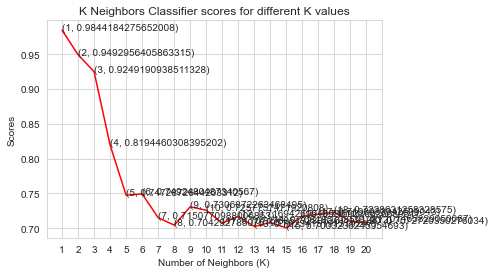

In [16]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [18]:
score.mean()*100

71.69426994098612